In [1]:
cd /content/drive/MyDrive/ColabNotebooks/ML/natural_gas_forecasting/data

/content/drive/MyDrive/ColabNotebooks/ML/natural_gas_forecasting/data


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('trimmed_data.csv', index_col="Date", parse_dates=True)
# df=pd.read_csv('processed_nasdaq.csv', index_col="Date", parse_dates=True)
df = df.drop(["Seasons", "Months"], axis=1)

df.head(10)

,Price
Date,
1997-01-16,4.71
1997-02-05,2.65
1997-03-17,2.01
1997-04-23,2.22
1997-05-07,2.34
1997-06-24,2.32
1997-07-17,2.29
1997-08-29,2.69
1997-09-26,3.24


In [4]:
df.head(50)

,Price
Date,
1997-01-16,4.71
1997-02-05,2.65
1997-03-17,2.01
1997-04-23,2.22
1997-05-07,2.34
1997-06-24,2.32
1997-07-17,2.29
1997-08-29,2.69
1997-09-26,3.24


In [5]:
df.describe()

,Price
count,283.000000
mean,4.731060
std,2.650898
min,1.820000
25%,2.900000
50%,3.840000
75%,5.965000
max,18.480000


In [6]:
df.isnull().sum()

Price    0
dtype: int64

# **Visualizing Data**

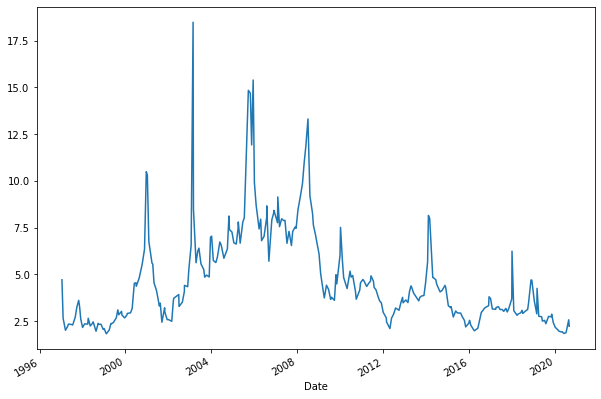

In [7]:
df.Price.plot(figsize=(10, 7))

# **Testing for stationarity**

In [8]:
from statsmodels.tsa.stattools import adfuller

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [9]:
test_result = adfuller(df.Price)

In [10]:
#Ho: It is not stationary
#H1: It is stationary

def adfuller_test(price):
    result = adfuller(price)
    labels = ["ADF Test statistic", "pi value", "#Lags used", "Number of observations used"]
    for value, label in zip(result, labels):
        print(label+ " : " + str(value))
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary")

In [11]:
adfuller_test(df.Price)

ADF Test statistic : -3.763743389653711
pi value : 0.0033008299363794444
#Lags used : 1
Number of observations used : 281
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


# **Differencing**

In [12]:
df["price_first_difference"] = df["Price"] - df["Price"].shift(1)

In [13]:
# there are price for 19 days in a month. And we have a seasonality of 12 months
df["seasonal_first_difference"] = df["Price"] - df["Price"].shift(12)

In [14]:
df.head(40)

,Price,price_first_difference,seasonal_first_difference
Date,,,
1997-01-16,4.71,NaN,NaN
1997-02-05,2.65,-2.06,NaN
1997-03-17,2.01,-0.64,NaN
1997-04-23,2.22,0.21,NaN
1997-05-07,2.34,0.12,NaN
1997-06-24,2.32,-0.02,NaN
1997-07-17,2.29,-0.03,NaN
1997-08-29,2.69,0.40,NaN
1997-09-26,3.24,0.55,NaN


In [15]:
df.dropna()

,Price,price_first_difference,seasonal_first_difference
Date,,,
1998-01-02,2.16,-0.45,-2.55
1998-02-06,2.35,0.19,-0.30
1998-03-31,2.34,-0.01,0.33
1998-04-08,2.65,0.31,0.43
1998-05-13,2.24,-0.41,-0.10
...,...,...,...
2020-05-05,1.93,0.01,-0.80
2020-06-03,1.84,-0.09,-0.66
2020-07-09,1.88,0.04,-0.66


In [16]:
adfuller_test(df.seasonal_first_difference.dropna())

ADF Test statistic : -4.401418768419198
pi value : 0.0002951211901124362
#Lags used : 16
Number of observations used : 254
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


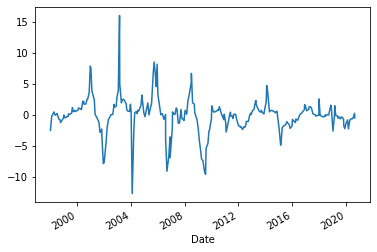

In [17]:
df.seasonal_first_difference.plot()

# **Auto Regressive Model**

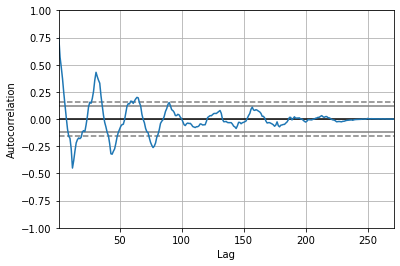

<Figure size 720x504 with 0 Axes>

In [18]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df.seasonal_first_difference.dropna())
plt.figure(figsize=(10, 7))
plt.show()

**p, d, q**

**p - AR model lags**
**d - differencing**
**q - MA model lags**

In [19]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

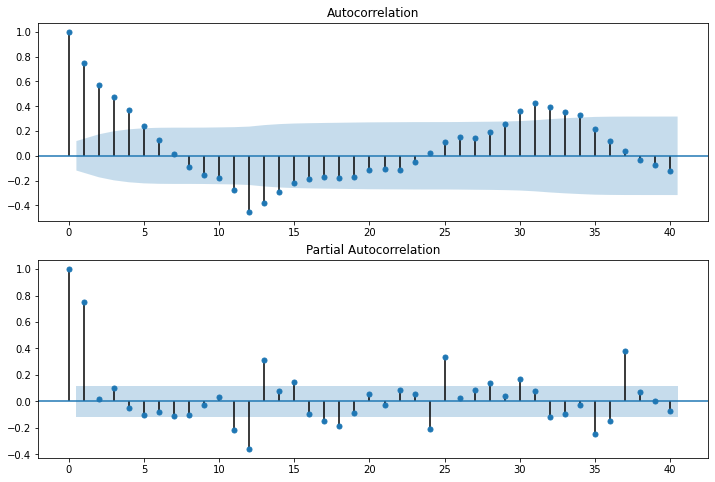

In [20]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df.seasonal_first_difference.dropna(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df.seasonal_first_difference.dropna(), lags=40, ax=ax2)

ar - 2(pac)
ma = 5(ac) 

shift(12) which is of 1year data
so, d = 1

In [21]:
# for non-seasonal data
from statsmodels.tsa.arima_model import ARIMA

In [22]:
model = ARIMA(df.Price.dropna(), order=(2, 1, 1))
model_fit = model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [23]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Price   No. Observations:                  282
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -471.948
Method:                       css-mle   S.D. of innovations              1.289
Date:                Sun, 05 Jun 2022   AIC                            953.895
Time:                        05:51:10   BIC                            972.105
Sample:                             1   HQIC                           961.197
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0026      0.021     -0.127      0.899      -0.043       0.038
ar.L1.D.Price     0.6956      0.068     10.262      0.000       0.563       0.829
ar.L2.D.Price     0.0449      0.063      0.712      0.477      -0.079       0.168
ma.L1.D.Price    -0.9332      0.032    -29.485      0.000      -0.995      -0.871
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3244           +0.0000j            1.3244            0.0000
AR.2          -16.8327           +0.0000j           16.8327            0.5000
MA.1            1.0716           +0.0000j            1.0716            0.0000
-----------------------------------------------------------------------------
"""

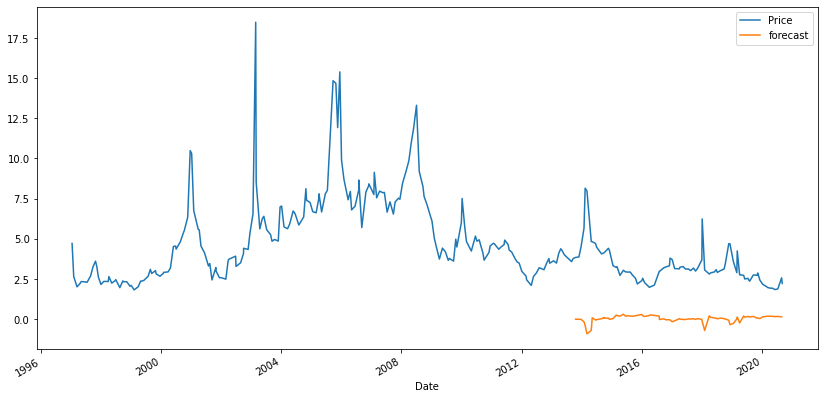

In [24]:
df["forecast"] = model_fit.predict(start=200, end=281, dynamic=False)
df[["Price", "forecast"]].plot(figsize=(14,7))

In [25]:
import statsmodels.api as sm

In [27]:
model4 = sm.tsa.statespace.SARIMAX(df.Price.dropna(), order=(2,1,4), seasonal_order=(2, 1, 4, 12))
results4 = model4.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


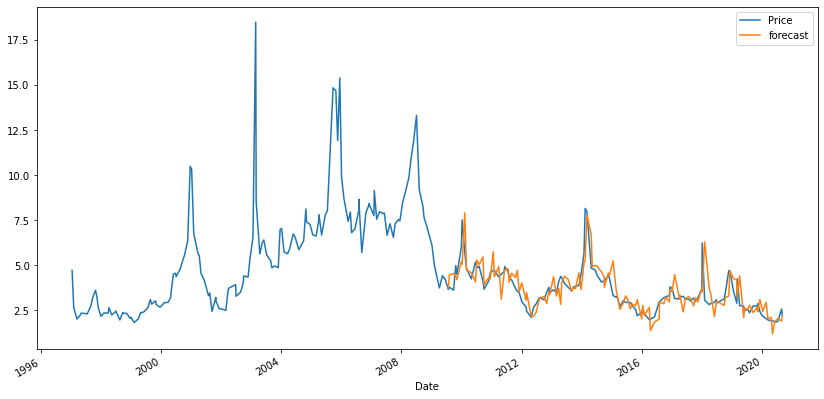

In [68]:
df["forecast"] = results4.predict(start=150, end=282, dynamic=False)
df[["Price", "forecast"]].plot(figsize=(14, 7))

In [69]:
from sklearn import metrics
print(metrics.mean_absolute_error(df.iloc[150:, 0], df.iloc[150:, 3]))

0.5290242287465657


In [37]:
df.tail(20)

,Price,price_first_difference,seasonal_first_difference,forecast
Date,,,,
2019-02-27,2.89,-0.69,-0.17,4.171276
2019-03-04,4.25,1.36,1.44,3.213918
2019-04-02,2.76,-1.49,-0.12,4.410271
2019-05-21,2.73,-0.03,-0.21,2.097412
2019-06-03,2.50,-0.23,-0.58,2.620466
2019-07-11,2.54,0.04,-0.37,2.540625
2019-08-01,2.36,-0.18,-0.68,2.781736
2019-09-16,2.75,0.39,-0.37,2.363822
2019-10-31,2.73,-0.02,-0.72,2.679798


In [30]:
from pandas.tseries.offsets import DateOffset
future_dates = [df.index[-1]+ DateOffset(months=x) for x in range(0, 12)]

In [31]:
future_datest_df = pd.DataFrame(index=future_dates[1:], columns=df.columns)

In [38]:
future_datest_df

,Price,price_first_difference,seasonal_first_difference,forecast
2020-10-01,NaN,NaN,NaN,NaN
2020-11-01,NaN,NaN,NaN,NaN
2020-12-01,NaN,NaN,NaN,NaN
2021-01-01,NaN,NaN,NaN,NaN
2021-02-01,NaN,NaN,NaN,NaN
2021-03-01,NaN,NaN,NaN,NaN
2021-04-01,NaN,NaN,NaN,NaN
2021-05-01,NaN,NaN,NaN,NaN
2021-06-01,NaN,NaN,NaN,NaN
2021-07-01,NaN,NaN,NaN,NaN


In [33]:
future_df = pd.concat([df, future_datest_df])

In [39]:
future_df.tail(50)

,Price,price_first_difference,seasonal_first_difference,forecast
2017-07-20,3.12,0.00,0.15,NaN
2017-08-14,3.02,-0.10,0.05,NaN
2017-09-19,3.18,0.16,-0.01,NaN
2017-10-13,2.99,-0.19,-0.26,NaN
2017-11-09,3.18,0.19,-0.14,NaN
2017-12-29,3.69,0.51,-0.11,NaN
2018-01-02,6.24,2.55,2.53,NaN
2018-02-01,3.06,-3.18,-0.09,NaN
2018-03-29,2.81,-0.25,-0.32,NaN
2018-04-16,2.88,0.07,-0.35,NaN


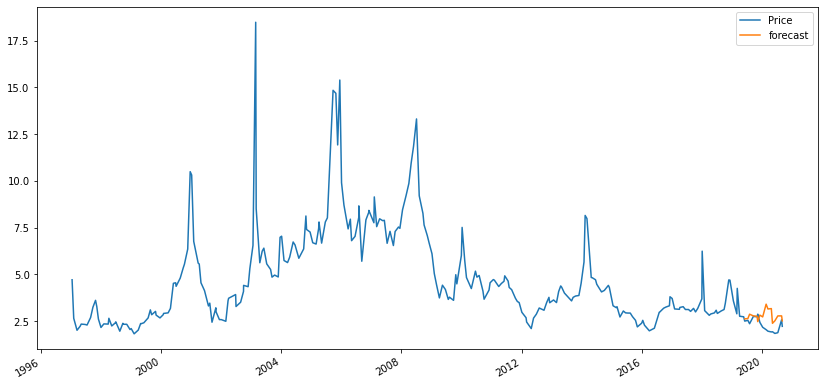

In [41]:
future_df["forecast"] = results4.predict(start=267, dynamic=True)
future_df[["Price", "forecast"]].plot(figsize=(14, 7))